**Q1**

In [142]:
import pandas as pd
import numpy as np
from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats

In [143]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-sunspots.csv')
data

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [144]:
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


**Q2**

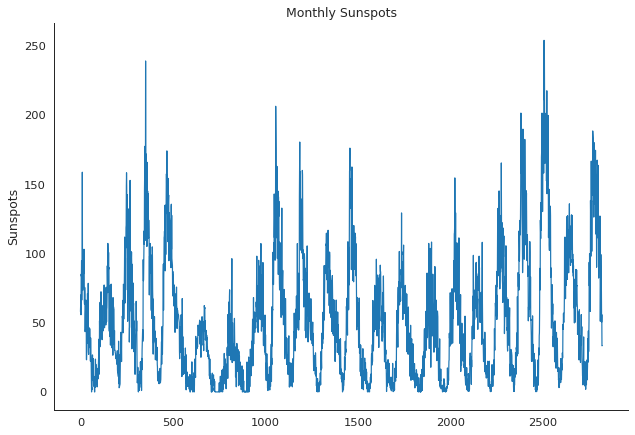

In [145]:
#Sunspots PLOT
data.plot(figsize=(9,6))
plt.ylabel('Sunspots')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Monthly Sunspots')
sns.despine(top=True)
plt.show()

Q3

In [146]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '1983-03-01', '1983-04-01', '1983-05-01', '1983-06-01',
               '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
               '1983-11-01', '1983-12-01'],
              dtype='datetime64[ns]', name='Month', length=2820, freq=None)

In [147]:
#convert to time series:
ts = data['Sunspots']
ts.head(10)

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
1749-06-01    83.5
1749-07-01    94.8
1749-08-01    66.3
1749-09-01    75.9
1749-10-01    75.5
Name: Sunspots, dtype: float64

In [148]:
#Q4
data.loc['1749-08-01']

Sunspots    66.3
Name: 1749-08-01 00:00:00, dtype: float64

**Q5 & Q6**

In [149]:
month_arr = []
year_arr = []
year = 1949
indexCol = []
for i in range(len(data['Sunspots'])):
  year_arr.append(year)
  indexCol.append(i+1)
  if((i+1)%12>0):
    month_arr.append((i+1)%12)
  else:
    month_arr.append(12)
    year = year + 1

In [150]:
data['Month_num'] = month_arr
data['Year_num'] = year_arr
data['indexCol'] = indexCol

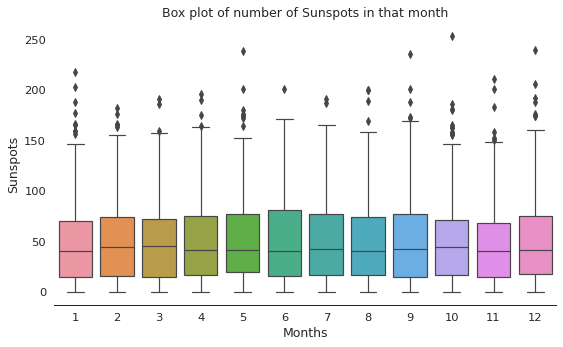

In [151]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Month_num", y="Sunspots", data=data)
plt.xlabel('Months')
plt.title('Box plot of number of Sunspots in that month')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Sunspots_monthly.pdf', dpi=1400)
plt.show()

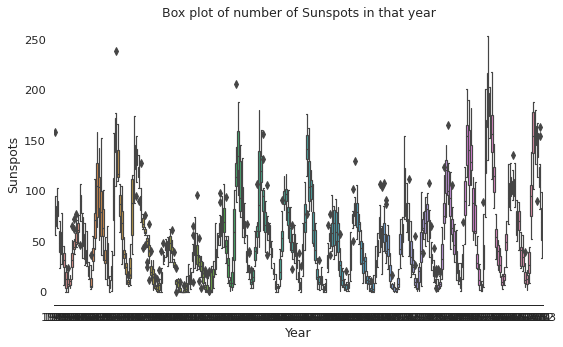

In [154]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Year_num", y="Sunspots", data=data)
plt.xlabel('Year')
plt.title('Box plot of number of Sunspots in that year')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Sunspots_year.pdf', dpi=1400)
plt.show()

Q7

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: 0.9791716279355249
Skewness of normal distribution: 1.1003002239205217


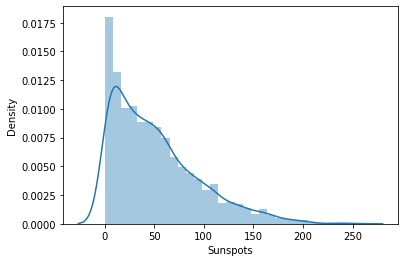

In [16]:
sns.distplot(data['Sunspots']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['Sunspots'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['Sunspots'])))

In [17]:
number_of_test = 24

no_of_train = len(data['Sunspots'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Sunspots'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Sunspots'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

In [18]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

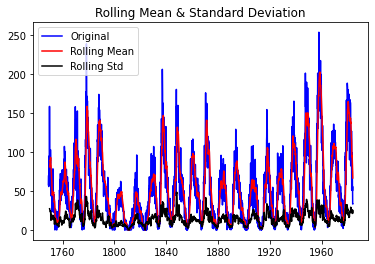

Results of Dickey-Fuller Test:
Test Statistic                -9.567668e+00
p-value                        2.333452e-16
#Lags Used                     2.700000e+01
Number of Observations Used    2.792000e+03
Critical Value (1%)           -3.432694e+00
Critical Value (5%)           -2.862576e+00
Critical Value (10%)          -2.567321e+00
dtype: float64


In [19]:
test_stationarity(data['Sunspots'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


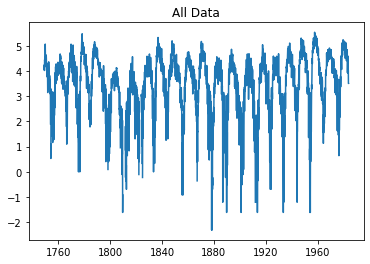

In [20]:
all_data_log = np.log(data['Sunspots'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

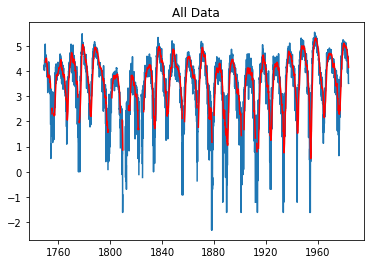

In [21]:
moving_avg = all_data_log.rolling(window=12).mean()
plt.plot(all_data_log)
plt.title("All Data")
plt.plot(moving_avg,color='red')
plt.show()

In [22]:
ts_log_moving_avg_diff = all_data_log - moving_avg
print(ts_log_moving_avg_diff)
ts_log_moving_avg_diff.head(24)

Month
1749-01-01         NaN
1749-02-01         NaN
1749-03-01         NaN
1749-04-01         NaN
1749-05-01         NaN
                ...   
1983-08-01   -0.184833
1983-09-01   -0.469093
1983-10-01   -0.321246
1983-11-01   -0.747427
1983-12-01   -0.633125
Name: Sunspots, Length: 2820, dtype: float64


Month
1749-01-01         NaN
1749-02-01         NaN
1749-03-01         NaN
1749-04-01         NaN
1749-05-01         NaN
1749-06-01         NaN
1749-07-01         NaN
1749-08-01         NaN
1749-09-01         NaN
1749-10-01         NaN
1749-11-01         NaN
1749-12-01    0.091328
1750-01-01   -0.078622
1750-02-01   -0.059820
1750-03-01    0.081445
1750-04-01    0.032907
1750-05-01    0.047214
1750-06-01    0.137547
1750-07-01   -0.011575
1750-08-01    0.139097
1750-09-01    0.002119
1750-10-01   -0.314251
1750-11-01   -0.274923
1750-12-01   -0.089818
Name: Sunspots, dtype: float64

In [23]:
# remove all NaN fields
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Month
1749-12-01    0.091328
1750-01-01   -0.078622
1750-02-01   -0.059820
1750-03-01    0.081445
1750-04-01    0.032907
Name: Sunspots, dtype: float64

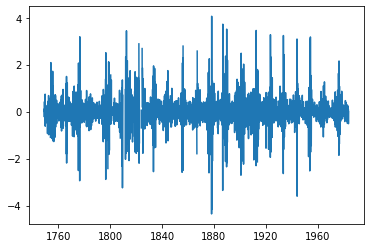

In [24]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

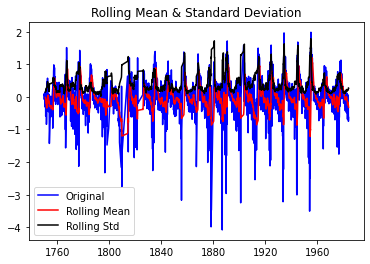

Results of Dickey-Fuller Test:
Test Statistic                -1.012900e+01
p-value                        9.021717e-18
#Lags Used                     1.700000e+01
Number of Observations Used    2.507000e+03
Critical Value (1%)           -3.432961e+00
Critical Value (5%)           -2.862694e+00
Critical Value (10%)          -2.567384e+00
dtype: float64


In [26]:
#remove Nan from obtained differenced series 
# and plot the original versus rolling mean verss rolling standard deviation
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

Q8 & Q9

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from numpy import mean
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import pandas as pd
import statsmodels
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import statsmodels.api
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
from datetime import datetime

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-sunspots.csv', header=0, index_col=0)

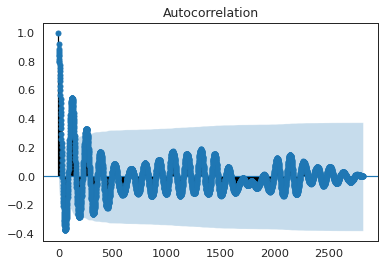

In [31]:
plot_acf(data, lags=len(data)-1)
plt.show()

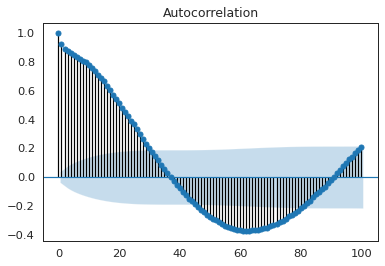

In [32]:
plot_acf(data, lags=100)
plt.show()

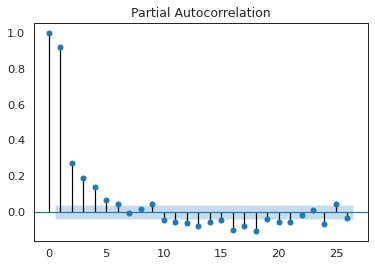

In [33]:
plot_pacf(data, lags=26)
pyplot.show()

In [34]:
# divide the differenced series into train and test
df_train['W_diff'] = ts_log_diff[0:no_of_train]
df_test['W_diff'] = ts_log_diff[no_of_train:]
data['W_diff'] = ts_log_diff

In [35]:
data['W_diff'] = ts_log_diff
data['W_diff'].dropna(inplace=True)
normalized = data['W_diff'].values
normalized1d=[]
for i in range(1,len(normalized)):
    normalized1d.append(normalized[i])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


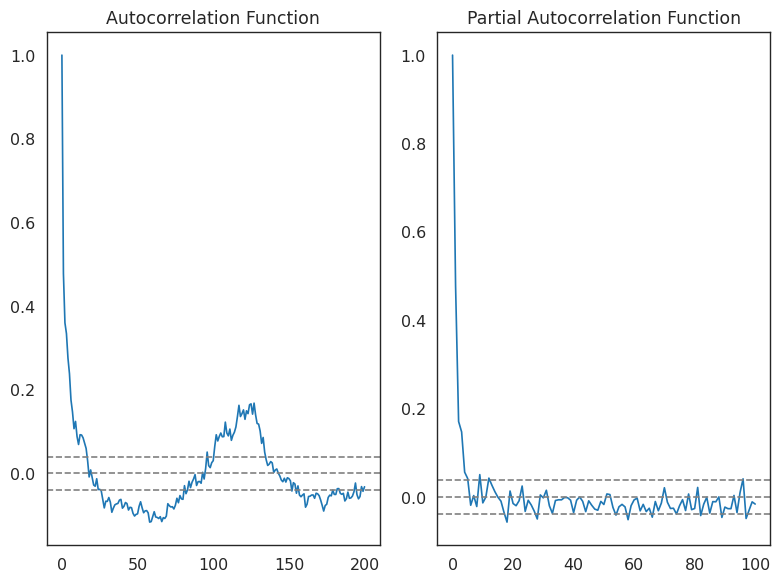

In [38]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_moving_avg_diff, nlags = 200)
lag_pacf = pacf(ts_log_moving_avg_diff, nlags = 100, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [42]:
#AR


from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_moving_avg_diff) - 24)
train, test = ts_log_moving_avg_diff[0:size], ts_log_moving_avg_diff[size:len(ts_log_moving_avg_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=-1, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [43]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i][0])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inversed_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inversed_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [44]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=151.178060, expected=111.200000
counter=2.000000, predicted=112.106447, expected=163.600000
counter=3.000000, predicted=164.655302, expected=153.800000
counter=4.000000, predicted=154.814765, expected=122.000000
counter=5.000000, predicted=122.997628, expected=82.200000
counter=6.000000, predicted=82.979790, expected=110.400000
counter=7.000000, predicted=111.182549, expected=106.100000
counter=8.000000, predicted=106.846112, expected=107.600000
counter=9.000000, predicted=108.423092, expected=118.800000
counter=10.000000, predicted=119.682991, expected=94.700000
counter=11.000000, predicted=95.539068, expected=98.100000
counter=12.000000, predicted=98.963277, expected=127.000000
counter=13.000000, predicted=127.953897, expected=84.300000
counter=14.000000, predicted=85.147496, expected=51.000000
counter=15.000000, predicted=51.685980, expected=66.500000
counter=16.000000, predicted=67.167720, expected=80.700000
counter=17.000000, predicted=81.418575, expect

Text(0, 0.5, 'Sunspots')

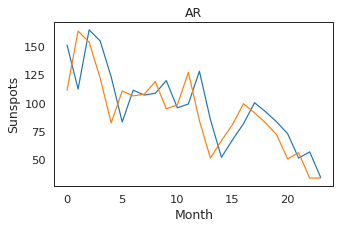

In [45]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5,3)

plt.plot(inversed_pred)
plt.plot(inversed_test)

axarr.set_title('AR')
plt.xlabel('Month')
plt.ylabel('Sunspots')

In [46]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 24.116794705969667


In [51]:
#MA

size = int(len(ts_log_moving_avg_diff) - 24)
train, test = ts_log_moving_avg_diff[0:size], ts_log_moving_avg_diff[size:len(ts_log_moving_avg_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [52]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))

inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=151.178060, expected=111.200000
counter=2.000000, predicted=112.106447, expected=163.600000
counter=3.000000, predicted=164.655302, expected=153.800000
counter=4.000000, predicted=154.814765, expected=122.000000
counter=5.000000, predicted=122.997628, expected=82.200000
counter=6.000000, predicted=82.979790, expected=110.400000
counter=7.000000, predicted=111.182549, expected=106.100000
counter=8.000000, predicted=106.846112, expected=107.600000
counter=9.000000, predicted=108.423092, expected=118.800000
counter=10.000000, predicted=119.682991, expected=94.700000
counter=11.000000, predicted=95.539068, expected=98.100000
counter=12.000000, predicted=98.963277, expected=127.000000
counter=13.000000, predicted=127.953897, expected=84.300000
counter=14.000000, predicted=85.147496, expected=51.000000
counter=15.000000, predicted=51.685980, expected=66.500000
counter=16.000000, predicted=67.167720, expected=80.700000
counter=17.000000, predicted=81.418575, expect

Text(0, 0.5, 'Sunspots')

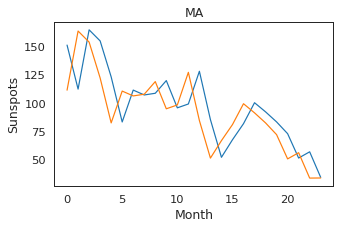

In [53]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5, 3)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('MA')
plt.xlabel('Month')
plt.ylabel('Sunspots')

In [54]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 24.116794705969667


In [57]:
# ARMA 
size = int(len(ts_log_moving_avg_diff) - 24)
train, test = ts_log_moving_avg_diff[0:size], ts_log_moving_avg_diff[size:len(ts_log_moving_avg_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.predict(len(history),len(history))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [58]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [59]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=151.128586, expected=111.200000
counter=2.000000, predicted=112.129930, expected=163.600000
counter=3.000000, predicted=164.624675, expected=153.800000
counter=4.000000, predicted=154.861633, expected=122.000000
counter=5.000000, predicted=122.964527, expected=82.200000
counter=6.000000, predicted=83.007204, expected=110.400000
counter=7.000000, predicted=111.247531, expected=106.100000
counter=8.000000, predicted=106.983777, expected=107.600000
counter=9.000000, predicted=108.497960, expected=118.800000
counter=10.000000, predicted=119.752036, expected=94.700000
counter=11.000000, predicted=95.605456, expected=98.100000
counter=12.000000, predicted=99.000020, expected=127.000000
counter=13.000000, predicted=128.013415, expected=84.300000
counter=14.000000, predicted=85.210985, expected=51.000000
counter=15.000000, predicted=51.726006, expected=66.500000
counter=16.000000, predicted=67.273598, expected=80.700000
counter=17.000000, predicted=81.596785, expect

Text(0, 0.5, 'Sunspots')

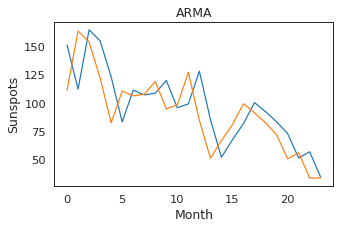

In [60]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5, 3)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('ARMA')
plt.xlabel('Month')
plt.ylabel('Sunspots')

In [61]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 24.116794705969667


In [63]:
# Optimize ARIMA parameters
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(ts_log_moving_avg_diff, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

0 1 1 3659.1256128861933
0 1 2 3616.3188478386874
1 1 0 3982.8763165563714
1 1 1 3606.617051135154


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 2 3541.66246471737


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 3 3541.800821189117


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 4 3530.8488214127156
2 1 0 3778.1988251260664


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

2 1 1 3595.213008972616


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 2 3508.2613762596675


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 3 3502.114356317221


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 4 3499.3504089399357
3 1 0 3719.0076731809263


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

3 1 1 3520.013846742835


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 2 3519.228921473384


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 3 3516.2626345531844


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 4 3505.2471272293965
4 1 0 3682.048445184023


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

4 1 1 3502.383623868095


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


4 1 2 3514.280798877179


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


4 1 3 3505.911483578564


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


4 1 4 3502.7898132813384
0 2 1 4413.699966537013
1 2 0 5802.67124324076


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

2 2 0 5132.897836748061


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

3 2 0 4784.94689813852


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

4 2 0 4514.6545250372
4 2 1 3687.3403522571343


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [67]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_moving_avg_diff) - 24)
train, test = ts_log_moving_avg_diff[0:size], ts_log_moving_avg_diff[size:len(ts_log_moving_avg_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(ar,d,ma))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='c')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

smallest aic val=3499.000000, ar=2.000000, d=1.000000, ma=4.000000 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [68]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [69]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=151.156774, expected=111.200000
counter=2.000000, predicted=112.140152, expected=163.600000
counter=3.000000, predicted=164.650827, expected=153.800000
counter=4.000000, predicted=154.823559, expected=122.000000
counter=5.000000, predicted=122.977711, expected=82.200000
counter=6.000000, predicted=83.039672, expected=110.400000
counter=7.000000, predicted=111.274429, expected=106.100000
counter=8.000000, predicted=106.946687, expected=107.600000
counter=9.000000, predicted=108.474495, expected=118.800000
counter=10.000000, predicted=119.719873, expected=94.700000
counter=11.000000, predicted=95.580695, expected=98.100000
counter=12.000000, predicted=99.001283, expected=127.000000
counter=13.000000, predicted=127.984175, expected=84.300000
counter=14.000000, predicted=85.183398, expected=51.000000
counter=15.000000, predicted=51.759052, expected=66.500000
counter=16.000000, predicted=67.291073, expected=80.700000
counter=17.000000, predicted=81.535269, expect

Text(0, 0.5, 'Sunspots')

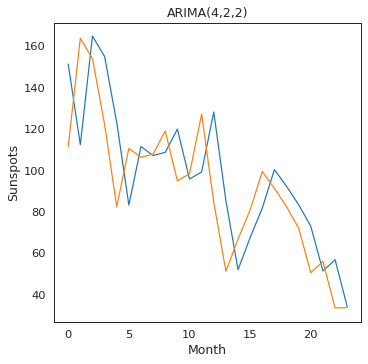

In [70]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,2,2)')
plt.xlabel('Month')
plt.ylabel('Sunspots')

In [71]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 24.116794705969667


Q10

In [73]:
import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-sunspots.csv')

In [75]:
data.dtypes

Month        object
Sunspots    float64
dtype: object

In [76]:
data.index

RangeIndex(start=0, stop=2820, step=1)

In [77]:
number_of_test = int(len(data) * 0.2)
no_of_train = len(data['Sunspots'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Sunspots'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Sunspots'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

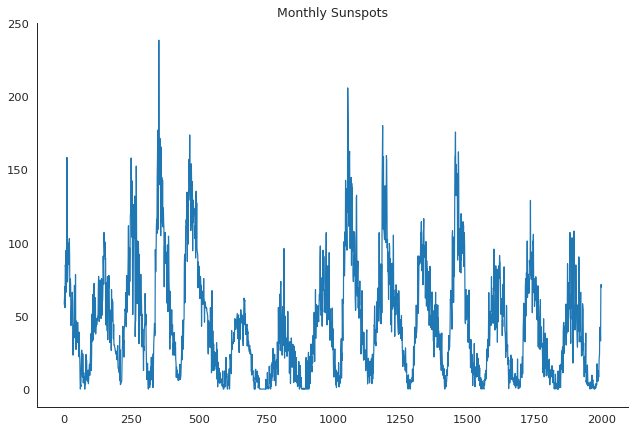

In [80]:
#Monthly sunspots plot
data['Sunspots'][0:2000].plot(figsize=(9,6))
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Monthly Sunspots')
sns.despine(top=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


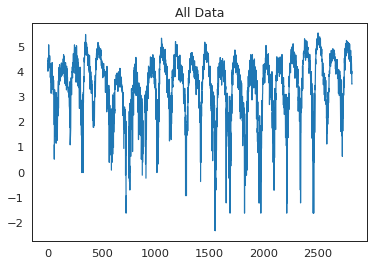

In [81]:
all_data_log = np.log(data['Sunspots'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

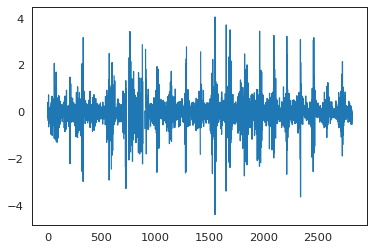

In [82]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

In [83]:
# remove all NaN fields
ts_log_diff.dropna(inplace = True)
ts_log_diff.head()

1    0.076322
2    0.111730
3   -0.228515
4    0.422671
5   -0.017805
Name: Sunspots, dtype: float64

Q12

In [90]:
from fbprophet import Prophet
# https://facebook.github.io/prophet/docs/quick_start.html

import pandas as pd
from pandas import DataFrame

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html
from pandas import to_datetime
from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html


from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [91]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-sunspots.csv')

In [92]:
data.dtypes

Month        object
Sunspots    float64
dtype: object

In [93]:
data = data.rename(columns={'Month': 'ds', 'Sunspots': 'y'})

data.head(5)

,ds,y
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


Text(0.5, 0, 'Month')

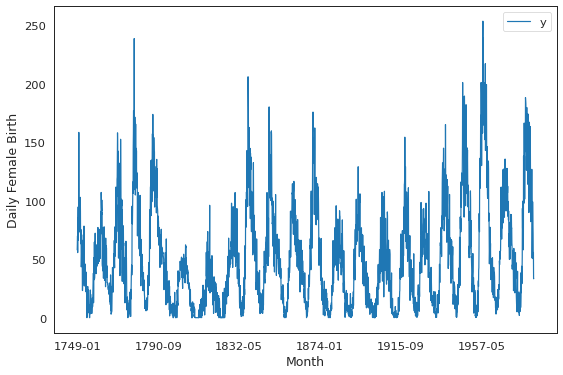

In [94]:
ax = data.set_index('ds').plot(figsize=(9, 6))
ax.set_ylabel('Daily Female Birth')
ax.set_xlabel('Month')

In [95]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [96]:
trainLen = 2790
train = data[:trainLen]
test = data[trainLen:]

In [97]:
my_model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future_Months = my_model.make_future_dataframe(periods=30, freq='MS')
future_Months.tail()

,ds
2815,1983-08-01
2816,1983-09-01
2817,1983-10-01
2818,1983-11-01
2819,1983-12-01


In [99]:
forecast = my_model.predict(future_Months)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2815,1983-08-01,89.142689,11.373667,167.974930
2816,1983-09-01,89.309075,8.204970,172.266121
2817,1983-10-01,88.416983,7.085922,165.358894
2818,1983-11-01,84.097641,2.704283,170.310347
2819,1983-12-01,87.124196,13.003694,164.787125


In [100]:
predicted = forecast['yhat'][2790:]

In [101]:
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 42.617


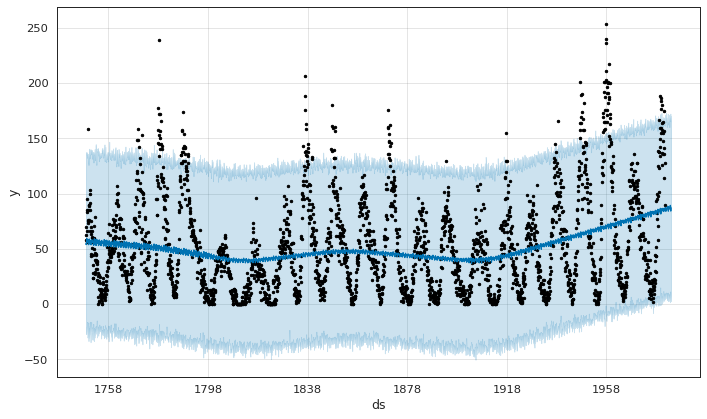

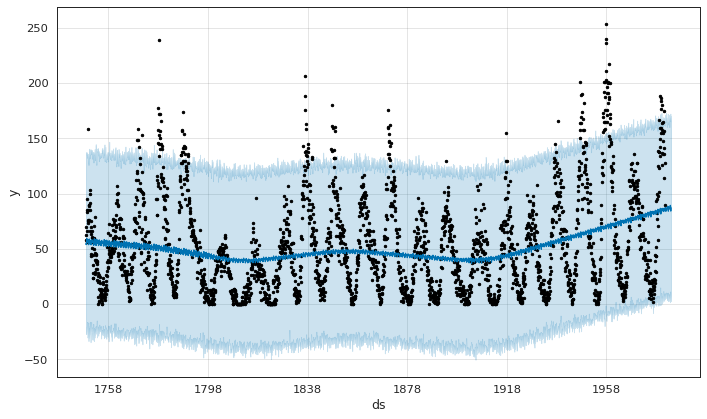

In [102]:
my_model.plot(forecast, uncertainty=True)

q13

vanilla

In [104]:
# https://keras.io/api/
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

In [105]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-sunspots.csv')

In [106]:
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [107]:
data.dtypes

Month        object
Sunspots    float64
dtype: object

In [110]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.dtypes

Month       datetime64[ns]
Sunspots           float64
dtype: object

In [111]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [112]:
raw_seq = data['Sunspots']
trainLen = 92
train = raw_seq[:trainLen]
test = raw_seq[trainLen:]

In [113]:
# choose a number of time steps
n_steps = 10

In [114]:
# split into samples
X, y = split_sequence(train, n_steps)

In [115]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [116]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [117]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


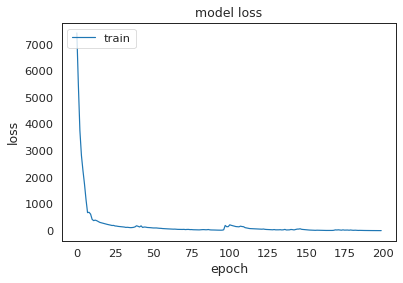

In [119]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
test = test.reset_index(drop = True)

In [121]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [122]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 26.787


In [123]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in true_divide



Stacked LSTM

In [127]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [128]:
# fit model
history= model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


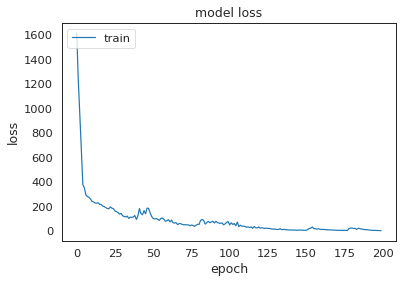

In [129]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [131]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 27.280


In [132]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in true_divide



Bi-directional 

In [133]:
from keras.layers import Bidirectional

In [134]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [135]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


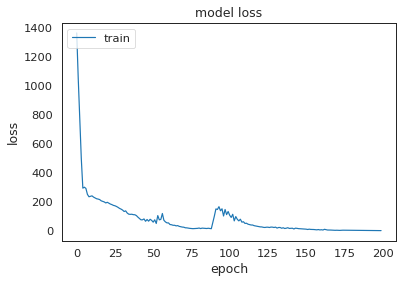

In [136]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [137]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)


In [138]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)


Test RMSE: 25.686


In [139]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in true_divide

